In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
sns.set(style="whitegrid")  # set style


In [7]:
kız = pd.read_csv('https://raw.githubusercontent.com/rnzbrk/R-files-/master/pisafemale.csv', sep=";")
kız = kız.set_index("Country").sort_values("2018")
kız["fark"] = kız["2018"] / kız["2015"] - 1
kız

,2015,2018,fark
Country,,,
Kosovo,356.729450,363.776533,0.019755
Argentina,400.443116,371.848368,-0.071408
Brazil,369.549307,379.269456,0.026303
Colombia,384.488336,381.365275,-0.008123
Indonesia,387.444975,383.446725,-0.010320
...,...,...,...
Netherlands,511.015941,518.547572,0.014739
Estonia,516.872753,519.187027,0.004477
Japan,525.495995,522.034617,-0.006587


In [8]:
erkek = pd.read_csv('https://raw.githubusercontent.com/rnzbrk/R-files-/master/pisamale.csv', sep=";")
erkek = erkek.set_index("Country").sort_values("2018")
erkek["fark"] = erkek["2018"] / erkek["2015"] - 1
erkek

,2015,2018,fark
Country,,,
Kosovo,366.189422,367.993933,0.004928
Indonesia,384.779279,373.734527,-0.028704
Argentina,418.388361,387.279360,-0.074354
Brazil,385.040591,387.871670,0.007353
North Macedonia,368.237357,390.933269,0.061634
...,...,...,...
Netherlands,513.497847,519.910895,0.012489
Estonia,522.080414,527.638015,0.010645
Japan,539.267257,532.156110,-0.013187


In [9]:
Fark1 = str(round(kız['fark'].mean()*100, 2))
Fark2 = str(round(erkek['fark'].mean()*100, 2))


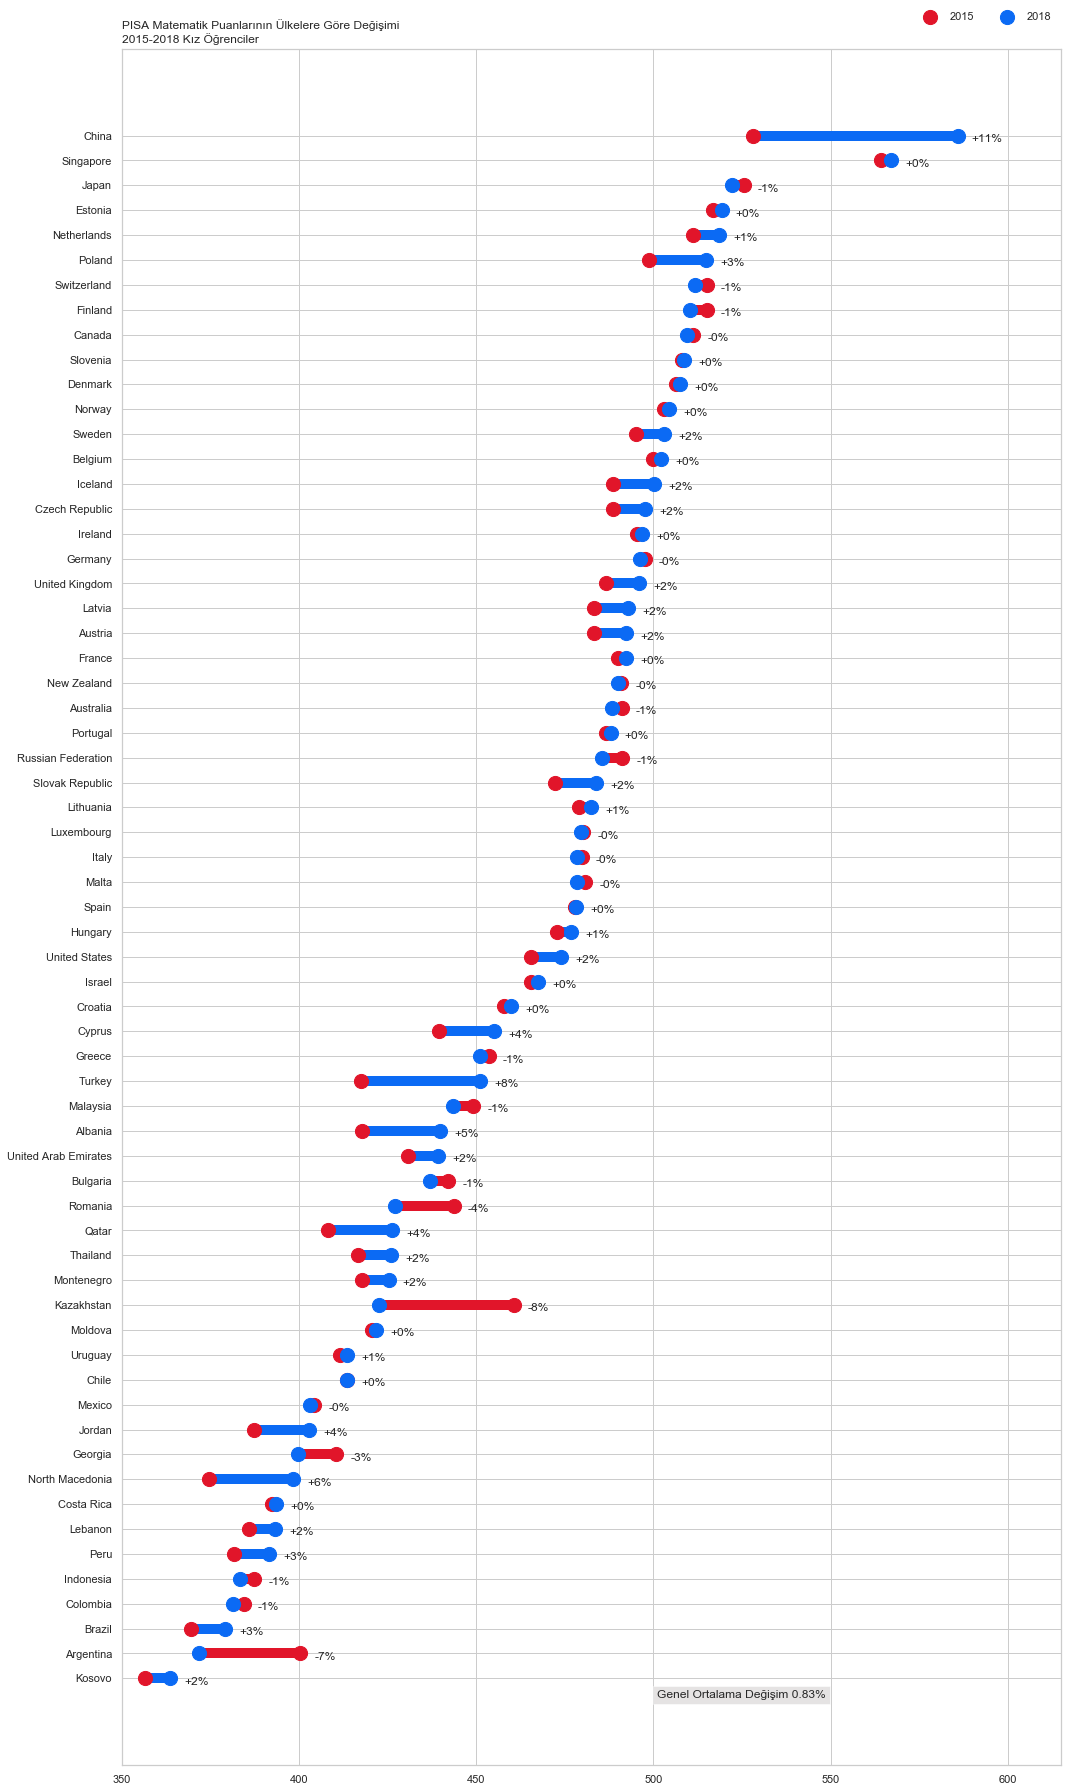

In [10]:
plt.figure(figsize=(15,25))
y_range = np.arange(1, len(kız.index) + 1)
colors = np.where(kız['2018'] > kız['2015'], '#0b6af4', '#E1152A')
plt.hlines(y=y_range, xmin=kız['2015'], xmax=kız['2018'],
           color=colors, lw=10)
plt.scatter(kız['2015'], y_range, color='#E1152A', s=200, label='2015', zorder=3)
plt.scatter(kız['2018'], y_range, color='#0b6af4', s=200 , label='2018', zorder=3)
for (_, row), y in zip(kız.iterrows(), y_range):
    plt.annotate(f"{row['fark']:+.0%}", (max(row["2015"], row["2018"]) + 4, y - 0.25))
plt.legend(ncol=2, bbox_to_anchor=(1., 1.01), loc="lower right", frameon=False)
plt.yticks(y_range, kız.index)
plt.title("PISA Matematik Puanlarının Ülkelere Göre Değişimi\n2015-2018 Kız Öğrenciler", loc='left')
plt.xlim(350, 615)
plt.gcf().subplots_adjust(left=0.35)
plt.tight_layout()
plt.text(501,0.2,"Genel Ortalama Değişim " + Fark1+"%",bbox=dict(facecolor='#ccc9c9', alpha=0.5))
plt.show()

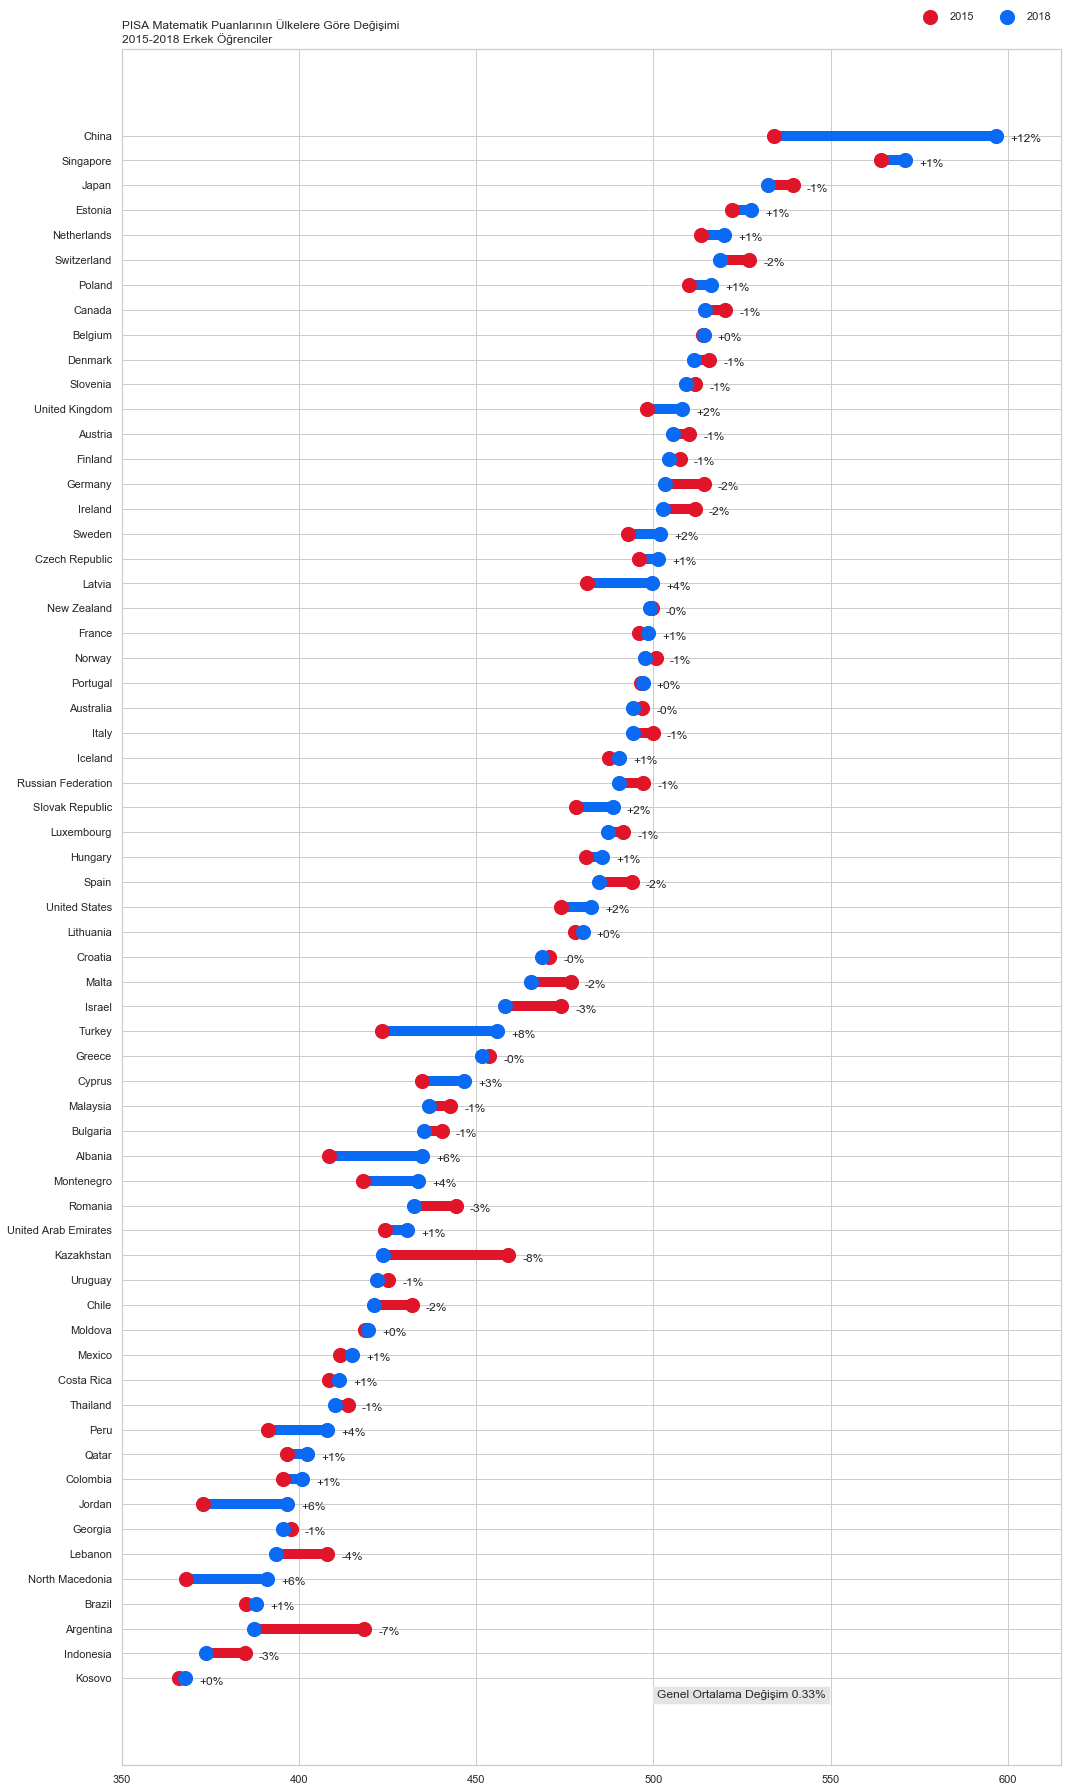

In [11]:
plt.figure(figsize=(15,25))
y_range = np.arange(1, len(erkek.index) + 1)
colors = np.where(erkek['2018'] > erkek['2015'], '#0b6af4', '#E1152A')
plt.hlines(y=y_range, xmin=erkek['2015'], xmax=erkek['2018'],
           color=colors, lw=10)
plt.scatter(erkek['2015'], y_range, color='#E1152A', s=200, label='2015', zorder=3)
plt.scatter(erkek['2018'], y_range, color='#0b6af4', s=200 , label='2018', zorder=3)
for (_, row), y in zip(erkek.iterrows(), y_range):
    plt.annotate(f"{row['fark']:+.0%}", (max(row["2015"], row["2018"]) + 4, y - 0.25))
plt.legend(ncol=2, bbox_to_anchor=(1., 1.01), loc="lower right", frameon=False)
plt.yticks(y_range, erkek.index)
plt.title("PISA Matematik Puanlarının Ülkelere Göre Değişimi\n2015-2018 Erkek Öğrenciler", loc='left')
plt.xlim(350, 615)
plt.gcf().subplots_adjust(left=0.35)
plt.tight_layout()
plt.text(501,0.2,"Genel Ortalama Değişim " + Fark2+"%",bbox=dict(facecolor='#ccc9c9', alpha=0.5))
plt.show()